<a href="https://colab.research.google.com/github/Gnanadency/CODSOFT/blob/main/CODSOFT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES PREDICTION(CODSOFT)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [ ]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.tail()

TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

## Data Inspection

In [ ]:
advertising.shape

(200, 4)

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

## Data Cleaning

In [ ]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

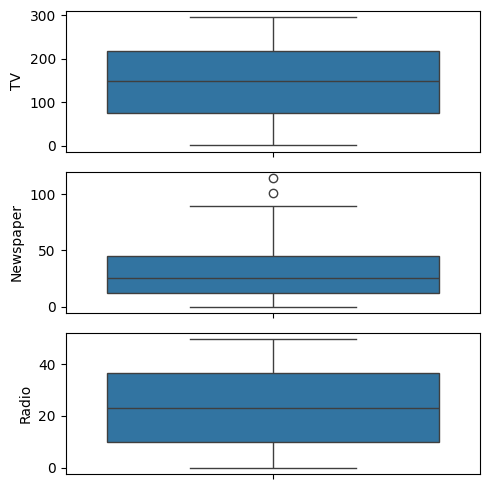

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()


In [ ]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

#### Sales

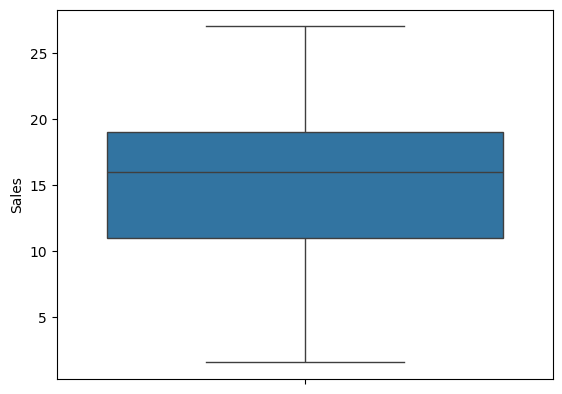

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

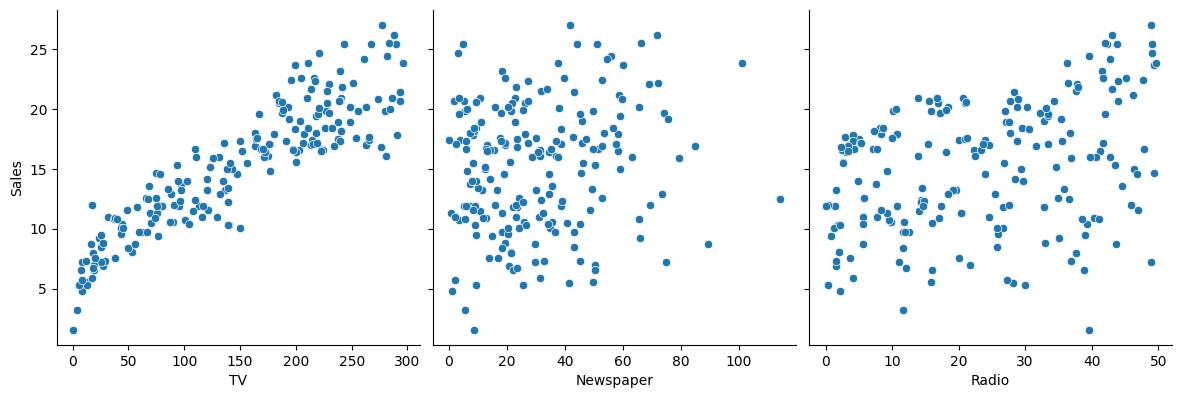

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
labels = ['TV', 'Radio', 'Newspaper']
sizes = [sum(d[label] for d in data) for label in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360)
plt.axis('equal')
plt.title('PIE CHART')
plt.show()

In [ ]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
tv_data = [d["TV"] for d in data]
radio_data = [d["Radio"] for d in data]
newspaper_data = [d["Newspaper"] for d in data]
plt.figure(figsize=(10, 6))
plt.boxplot([tv_data, radio_data, newspaper_data], labels=["TV", "Radio", "Newspaper"])
plt.title('Sales Prediction')
plt.ylabel('Advertising')
plt.show()


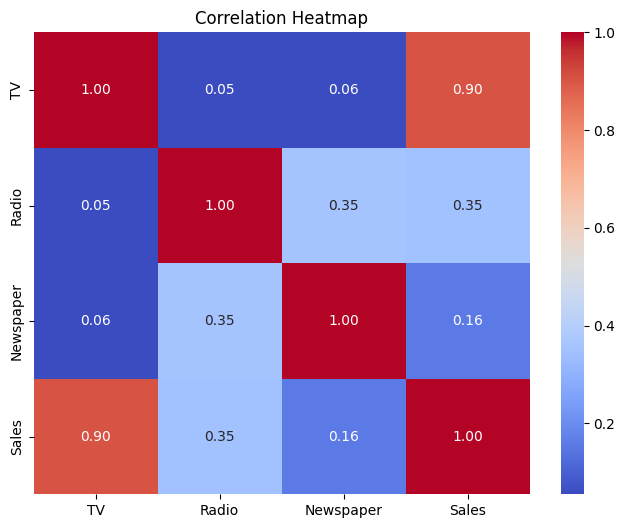

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(advertising.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.pairplot(advertising,kind='reg')
plt.show()

**LINEAR REGRESSION**

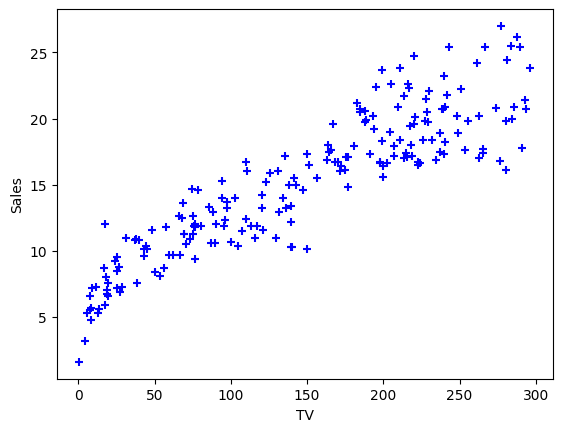

In [ ]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(advertising.TV,advertising.Sales,color='blue',marker='+')

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(advertising[['TV']] ,advertising.Sales)

LinearRegression()

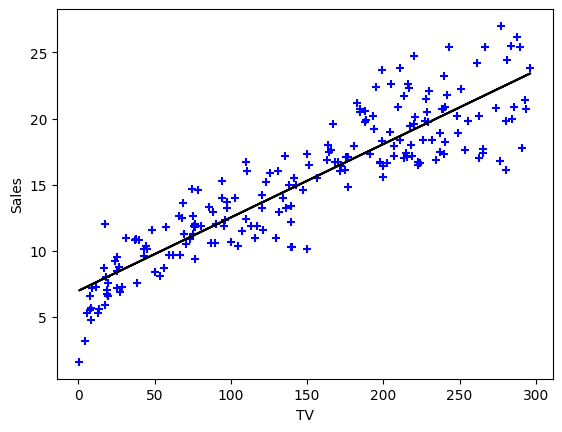

In [ ]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(advertising.TV,advertising.Sales,color='blue',marker='+')
plt.plot(advertising.TV,reg.predict(advertising[['TV']]),color = 'black')

In [ ]:
%matplotlib inline
plt.xlabel('RADIO')
plt.ylabel('Sales')
plt.scatter(advertising.Radio,advertising.Sales,color='Red',marker='d')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(advertising[['Radio']] ,advertising.Sales)

LinearRegression()

In [ ]:
%matplotlib inline
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.scatter(advertising.Radio,advertising.Sales,color='Red',marker='d')
plt.plot(advertising.Radio,reg.predict(advertising[['Radio']]),color = 'black')

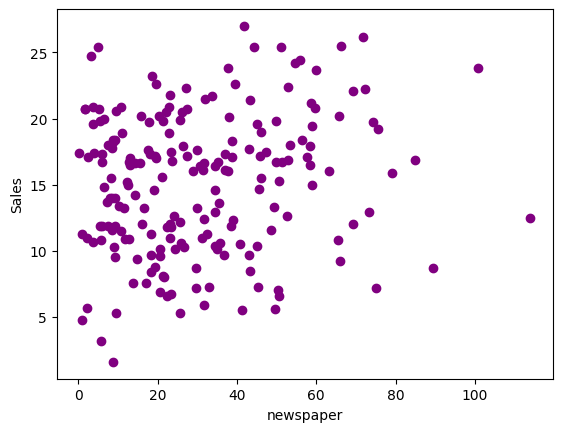

In [ ]:
%matplotlib inline
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(advertising.Newspaper,advertising.Sales,color='Purple',marker='o')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(advertising[['Newspaper']] ,advertising.Sales)

LinearRegression()

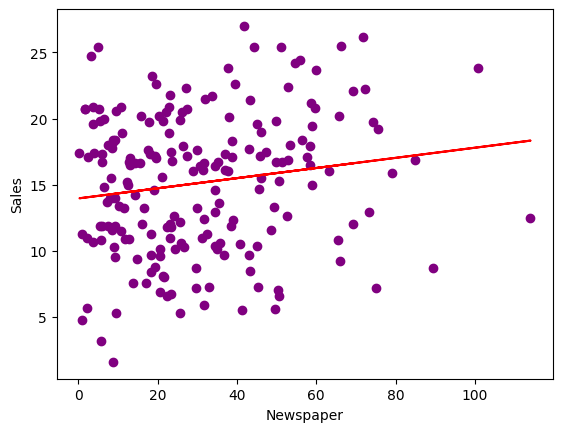

In [ ]:
%matplotlib inline
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(advertising.Newspaper,advertising.Sales,color='Purple',marker='o')
plt.plot(advertising.Newspaper,reg.predict(advertising[['Newspaper']]),color = 'Red')